# Eigenvectors and eigenvalues

## Eigenvectors

When a flipping matrix is applied to a vector, an eigenvector of a matrix retains it direction. It stays on the same axis (it hasn't been *knocked off its span*).

If a shearing matrix is applied to a vector, if a vector is knocked off its span, it is not an eigenvector of the matrix.

## Eigenvalues

If an eigenvector retains its exact length, its eigenvalue is 1.

If an eigenvector were to double its length, its eigenvalue would be 2. If it were to halve its length, its eigenvalue would be 0.5.

Eigenvalues can also have a negative sign: for example, a shearing-and-flipping matrix has the same eigenvectors as the shearing matrix, but its eigenvalue is negative.

Let's say we have a vector $v$ and a matrix $A$. If $v$ is an eigenvector of $A$, then the following equation holds: $Av = λv$, where $λ$ is the eigenvalue.

## Eigenvectors and eigenvalues with Python

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [6]:
v = np.array([3, 1])
I = np.array([[1, 0], [0, 1]])
E = np.array([[1, 0], [0, -1]])
F = np.array([[-1, 0], [0, 1]])
A = np.array([[-1, 4], [2, -2]])
V = np.array([[ 3,  2, -3, -1],[ 1,  1, -1,  1]])

To calculate the eigenvalues and eigenvectors of a matrix, we can use the NumPy `eig()` method, which returns a tuple of:
- a vector of eigenvalues
- a matrix of eigenvectors

In [7]:
lambdas, V = np.linalg.eig(A)

The matrix contains as many eigenvectors as the number of columns in the matrix $A$. Each column of the matrix $V$ is an eigenvector of the matrix $A$:

In [8]:
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

The eigenvalues are stored in`lambdas`: the result from this example mean that the original eigenvector $v$ has been lengthened $\approx 1.37$ times.

In [16]:
lambdas

array([ 1.37228132, -4.37228132])

We can confirm that $Av = λv$:

In [17]:
v = V[:, 0]
v

array([0.86011126, 0.51010647])

In [23]:
lambda1 = lambdas[0]
lambda1

1.3722813232690143

In [24]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [25]:
lambda1 * v

array([1.18031462, 0.70000958])

In [26]:
def plot_vectors(vectors, colors, labels=None):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    labels: list, optional
        Labels for the vectors to show in the legend. If None, no legend is shown.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'], ['Vector 1', 'Vector 2'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.grid(alpha=0.2)
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    # If labels are not provided, create empty labels
    if labels is None:
        labels = [f"Vector {i+1}" for i in range(len(vectors))]

    for i in range(len(vectors)):
        x = np.concatenate([[0,0], vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],
                   label=labels[i])

    # Add the legend
    plt.legend(loc='best')

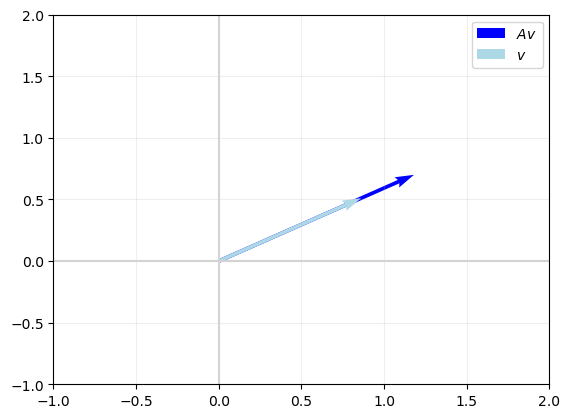

In [27]:
plot_vectors([Av, v], ['blue', 'lightblue'], [r'$Av$', r'$v$'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

For the second eigenvector:

In [28]:
v2 = V[:, 1]
v2

array([-0.76454754,  0.64456735])

In [29]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [30]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [31]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

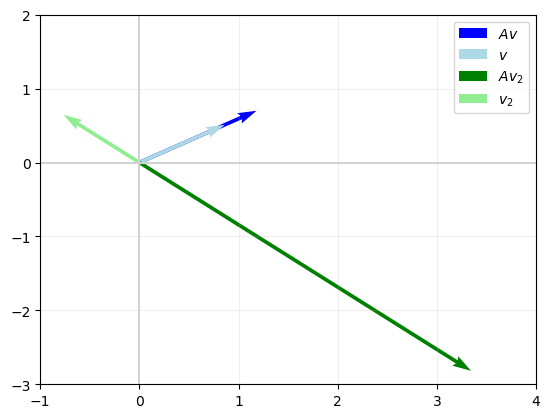

In [34]:
plot_vectors([Av, v, Av2, v2],
            ['blue', 'lightblue', 'green', 'lightgreen'], [r'$Av$', r'$v$', r'$Av_2$', r'$v_2$'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using PyTorch `eig()` method:

In [35]:
A

array([[-1,  4],
       [ 2, -2]])

In [38]:
A_pt = torch.tensor(A, dtype=torch.float32)
A_pt

tensor([[-1.,  4.],
        [ 2., -2.]])

Note that, by default, PyTorch uses complex numbers to store the eigenvalues and eigenvectors. For the sake of this example, since the matrix is real, let's just convert the results to real numbers:

In [64]:
eigenvalues, eigenvectors = torch.linalg.eig(A_pt)
eigenvec = eigenvectors.real
eigenvals = eigenvalues.real

In [65]:
v_pt = eigenvec[:, 0]
v_pt

tensor([0.8601, 0.5101])

In [67]:
lambda_pt = eigenvals[0]
lambda_pt

tensor(1.3723)

In [68]:
Av_pt = A_pt @ v_pt
Av_pt

tensor([1.1803, 0.7000])

In [69]:
v2_pt = eigenvec[:, 1]
v2_pt

tensor([-0.7645,  0.6446])

In [70]:
lambda2_pt = eigenvals[1]
lambda2_pt

tensor(-4.3723)

In [71]:
Av2_pt = A_pt @ v2_pt
Av2_pt

tensor([ 3.3428, -2.8182])

In [72]:
lambda2_pt * v2_pt

tensor([ 3.3428, -2.8182])

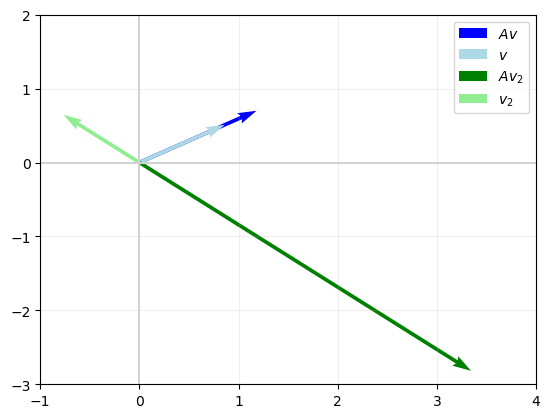

In [73]:
plot_vectors([Av_pt, v_pt, Av2_pt, v2_pt],
            ['blue', 'lightblue', 'green', 'lightgreen'], [r'$Av$', r'$v$', r'$Av_2$', r'$v_2$'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

#### Eigenvectors in >2 dimensions

In [74]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [77]:
lambdas_X, V_X = np.linalg.eig(X)

In [78]:
V_X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [79]:
lambdas_X

array([29.67623202, 20.62117365, -0.29740567])